In [1]:
import torch.nn as nn
import torch

import sys, os
import random
import numpy as np
from shutil import copy
import matplotlib.pyplot as plt
from copy import deepcopy

from omegaconf import OmegaConf
import shutil
import pickle
import random
from tqdm import tqdm

from torchvision.datasets.folder import ImageFolder
from torch.utils.data import DataLoader
# from skimage.filters import threshold_local, gaussian

from datetime import datetime


In [2]:
# run_path = '/home/harishbabu/projects/PIPNet/runs/010-CUB-27-imgnet_OOD_cnext26_img=224_nprotos=20'
# run_path = '/home/harishbabu/projects/PIPNet/runs/031-CUB-18-imgnet_cnext26_img=224_nprotos=20_orth-on-rel'
# run_path = '/home/harishbabu/projects/PIPNet/runs/032-CUB-18-imgnet_cnext26_img=224_nprotos=20_orth-on-rel'

# run_path = '/home/harishbabu/projects/PIPNet/runs/035-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel'

# run_path = '/home/harishbabu/projects/PIPNet/runs/043-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel'
# run_path = "/home/harishbabu/projects/PIPNet/runs/036-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel_uniformity"
# run_path = "/home/harishbabu/projects/PIPNet/runs/041-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel"
# run_path = "/home/harishbabu/projects/PIPNet/runs/042-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel"

# run_path = "/home/harishbabu/projects/PIPNet/runs/044-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20-or-4per-desc_orth-on-rel"

# run_path = "/home/harishbabu/projects/PIPNet/runs/046-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=10per-desc_orth-on-rel"
# run_path = "/home/harishbabu/projects/PIPNet/runs/047-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=5per-desc_tanh-desc"
# run_path = "/home/harishbabu/projects/PIPNet/runs/048-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=5per-desc_tanh-desc_unit-sphere"
# run_path = "/home/harishbabu/projects/PIPNet/runs/051-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_tanh-desc_unit-sphere_AW=5-TW=2-UW=2-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/052-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=4per-desc_tanh-desc_unit-sphere_AW=5-TW=2-UW=2-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/055-CUB-18_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/056-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/057-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/058-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2"

# with unit sphere
# run_path = "/home/harishbabu/projects/PIPNet/runs/059-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# unit sphere with softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/065-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# original hpipnet with 20 protos per node no KO, no OOD, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/062-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD"

# original hpipnet with 20 protos per node no KO, no OOD, WITH tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/063-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD_tanh-desc"

# with unit sphere but no AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/066-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_no-softmax_no-align_no-uni_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, with softmax, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/067-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, with softmax, no tanh-desc, INCORRECT
# run_path = "/home/harishbabu/projects/PIPNet/runs/067-incorrect-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, no softmax, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/068-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# 071 with bias
# run_path = "/home/harishbabu/projects/PIPNet/runs/071-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_with-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 072 gumbel softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/072-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-gumbel-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 073 gumbel softmax, tau-1.0
# run_path = "/home/harishbabu/projects/PIPNet/runs/073-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-gumbel-softmax-tau=1_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 075 068 with focal loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/075-068-with-focal_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 076 cs followed by softmax. Uses align_pf along with align+uni
# run_path = "/home/harishbabu/projects/PIPNet/runs/076_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_align-pf-during-training_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2-APW=5_batch=20"

# 074 multiply_cs_softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/074-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_multi-cs-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 077 unit sphere protopool with cosin no softmax constant 20 protos per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/077_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20-sphere-protopool_finetune=5_align-pf-during-training_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 082 unit sphere cs followed by softmax with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/082-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 083 unit sphere cs followed by softmax with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/083-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_no-align_no-uni_no-mm-loss_batch=48"

# 085 unit sphere cs followed by softmax-with-tau with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/085-notebook-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=12"

# 091 basic gaussian multiplier on stage 4
# run_path = "/home/harishbabu/projects/PIPNet/runs/091-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=256_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 092 basic gaussian multiplier on stage 3, 4
# run_path = "/home/harishbabu/projects/PIPNet/runs/092-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=3,4|1.0|50_img=224_latent-dim=256_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 093 128 dim linear
# run_path = "/home/harishbabu/projects/PIPNet/runs/093-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=128_nprotos=20_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=1-CW=2_mm-loss_batch=48"

# 094 128 dim linear
# run_path = "/home/harishbabu/projects/PIPNet/runs/094-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=128_nprotos=20_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=1-CW=2_mm-loss_batch=48"

# 095 ablation 091 without AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/095-091-woALUNI-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_no-AL_no-UNI_mm-loss_batch=48"

# 096 ablation 091 without AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/096-091-wfocal-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 097 - 091 with bg
# run_path = "/home/harishbabu/projects/PIPNet/runs/097-091-wbg-CUB-18_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 0100 cub29 with 20 per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/100_CUB-29-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=20_unit-sphere-protopool_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 0101 baseline with 4 per desc per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/101-baseline-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_no-KO_no-OOD"

# 0103 091 with 20 per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/103-091-wProtoPool20PerNode_CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=20_unit-sphere-protopool_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_batch=48"

# 0108 LOU3
# run_path = "/home/harishbabu/projects/PIPNet/runs/108-wProtoPool20PerNode_LOU3_CUB-18-imgnet-bg_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=20_unit-sphere-protopool_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_batch=48"

# 154 pruning CUB-18
# run_path = "/home/harishbabu/projects/PIPNet/runs/154-PruningNaiveHPIPNet_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# 155 pruning CUB-190
# run_path = "/home/harishbabu/projects/PIPNet/runs/155-PruningNaiveHPIPNet_cnext13_CUB-190-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# 153 pruning CUB-29
# run_path = "/home/harishbabu/projects/PIPNet/runs/153-PruningNaiveHPIPNet_cnext13_CUB-29-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# 156 pruning CUB-18 LOU3
# run_path = "/home/harishbabu/projects/PIPNet/runs/156-PruningNaiveHPIPNet_LOU3_cnext13_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# 157 pruning CUB-29 LOU3
# run_path = "/home/harishbabu/projects/PIPNet/runs/157-PruningNaiveHPIPNet_LOU3_cnext13_CUB-29-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/178-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/179-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-190-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/180-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=2.0MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/181-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=2.0MinCont=0.1_cnext26_CUB-190-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

# run_path = "/home/harishbabu/projects/PIPNet/runs/182-PruningNaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.1MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

run_path = "/home/harishbabu/projects/PIPNet/runs/183-PruningBF=1.1NaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20"

# try:
#     sys.path.remove('/home/harishbabu/projects/PIPNet')
# except:
#     pass
# sys.path.insert(0, os.path.join(run_path, 'source_clone'))

print(run_path)

/home/harishbabu/projects/PIPNet/runs/183-PruningBF=1.1NaiveHPIPNetMaskL1=0.5MaskTrainExtra=15epsEps=60TanhDesc=0.05MinCont=0.1_cnext26_CUB-190-imgnet-224_WeightedCE_with-equalize-aug_img=224_nprotos=20


In [3]:
from pipnet.pipnet import PIPNet, get_network
from util.log import Log
from util.args import get_args, save_args, get_optimizer_nn
from util.data import get_dataloaders
from util.func import init_weights_xavier
from pipnet.train import train_pipnet, test_pipnet
# from pipnet.test import eval_pipnet, get_thresholds, eval_ood
from util.eval_cub_csv import eval_prototypes_cub_parts_csv, get_topk_cub, get_proto_patches_cub
from util.vis_pipnet import visualize, visualize_topk
from util.visualize_prediction import vis_pred, vis_pred_experiments
from util.node import Node
from util.phylo_utils import construct_phylo_tree, construct_discretized_phylo_tree
from util.func import get_patch_size
from util.data import ModifiedLabelLoader

Heatmaps showing where a prototype is found will not be generated because OpenCV is not installed.


In [4]:
args_file = open(os.path.join(run_path, 'metadata', 'args.pickle'), 'rb')
args = pickle.load(args_file)

if args.phylo_config:
    phylo_config = OmegaConf.load(args.phylo_config)

if args.phylo_config:
    # construct the phylo tree
    if phylo_config.phyloDistances_string == 'None':
        if '031' in run_path: # this run uses a different phylogeny file that had an extra root node which is a mistake
            root = construct_phylo_tree('/home/harishbabu/data/phlyogenyCUB/18Species-with-extra-root-node/1_tree-consensus-Hacket-18Species-modified_cub-names_v1.phy')
        else:
            root = construct_phylo_tree(phylo_config.phylogeny_path)
        print('-'*25 + ' No discretization ' + '-'*25)
    else:
        root = construct_discretized_phylo_tree(phylo_config.phylogeny_path, phylo_config.phyloDistances_string)
        print('-'*25 + ' Discretized ' + '-'*25)
else:
    # construct the tree (original hierarchy as described in the paper)
    root = Node("root")
    root.add_children(['animal','vehicle','everyday_object','weapon','scuba_diver'])
    root.add_children_to('animal',['non_primate','primate'])
    root.add_children_to('non_primate',['African_elephant','giant_panda','lion'])
    root.add_children_to('primate',['capuchin','gibbon','orangutan'])
    root.add_children_to('vehicle',['ambulance','pickup','sports_car'])
    root.add_children_to('everyday_object',['laptop','sandal','wine_bottle'])
    root.add_children_to('weapon',['assault_rifle','rifle'])
    # flat root
    # root.add_children(['scuba_diver','African_elephant','giant_panda','lion','capuchin','gibbon','orangutan','ambulance','pickup','sports_car','laptop','sandal','wine_bottle','assault_rifle','rifle'])
root.assign_all_descendents()

exp_no = int(os.path.basename(run_path)[:3])

if exp_no < 77:
    if ('num_protos_per_descendant' in args) and (args.num_protos_per_descendant > 0):
        for node in root.nodes_with_children():
            node.set_num_protos(args.num_protos_per_descendant)
if exp_no == 77:
    # update num of protos per node based on num_protos_per_descendant
    if args.num_features == 0 and args.num_protos_per_descendant == 0:
        raise Exception('Either of num_features or num_protos_per_descendant must be greater than zero')
    for node in root.nodes_with_children():
        node.set_num_protos(num_protos_per_descendant=args.num_protos_per_descendant,\
                                                            min_protos=args.num_features)
else:
    if ('num_protos_per_descendant' in args):
        # update num of protos per node based on num_protos_per_descendant
        if args.num_features == 0 and args.num_protos_per_descendant == 0:
            raise Exception('Either of num_features or num_protos_per_descendant must be greater than zero')
        for node in root.nodes_with_children():
            node.set_num_protos(num_protos_per_descendant=args.num_protos_per_descendant,\
                                min_protos=args.num_features,\
                                split_protos=('protopool' in args) and (args.protopool == 'n'))

------------------------- No discretization -------------------------


In [5]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    device_ids = [torch.cuda.current_device()]
else:
    device = torch.device('cpu')
    device_ids = []

# args_file = open(os.path.join(run_path, 'metadata', 'args.pickle'), 'rb')
# args = pickle.load(args_file)

# ckpt_file_name = 'net_overspecific_pruned_replaced_thresh=0.5_last'
ckpt_file_name = 'net_trained_last'
# ckpt_file_name = 'net_trained_10'
# ckpt_file_name = 'net_pretrained'
epoch = ckpt_file_name.split('_')[-1]

ckpt_path = os.path.join(run_path, 'checkpoints', ckpt_file_name)
checkpoint = torch.load(ckpt_path, map_location=device)

if ckpt_file_name != 'net_trained_last':
    print('\n', (10*'-')+'WARNING: Not using the final trained model'+(10*'-'), '\n')

# Obtain the dataset and dataloaders
trainloader, trainloader_pretraining, trainloader_normal, trainloader_normal_augment, projectloader, testloader, test_projectloader, classes = get_dataloaders(args, device)

print(args.batch_size, trainloader.batch_size)

if len(classes)<=20:
    if args.validation_size == 0.:
        print("Classes: ", testloader.dataset.class_to_idx, flush=True)
    else:
        print("Classes: ", str(classes), flush=True)

# Create a convolutional network based on arguments and add 1x1 conv layer
feature_net, add_on_layers, pool_layer, classification_layers, num_prototypes = get_network(len(classes), args, root=root)
   
# Create a PIP-Net
net = PIPNet(num_classes=len(classes),
                    num_prototypes=num_prototypes,
                    feature_net = feature_net,
                    args = args,
                    add_on_layers = add_on_layers,
                    pool_layer = pool_layer,
                    classification_layers = classification_layers,
                    num_parent_nodes = len(root.nodes_with_children()),
                    root = root
                    )
net = net.to(device=device)
net = nn.DataParallel(net, device_ids = device_ids)    
net.load_state_dict(checkpoint['model_state_dict'],strict=True)
# print(net.eval())
criterion = nn.NLLLoss(reduction='mean').to(device)

# Forward one batch through the backbone to get the latent output size
with torch.no_grad():
    xs1, _, _ = next(iter(trainloader))
    xs1 = xs1.to(device)
    _, proto_features, _, _ = net(xs1)
    wshape = proto_features['root'].shape[-1]
    args.wshape = wshape #needed for calculating image patch size
    print("Output shape: ", proto_features['root'].shape, flush=True)
    
print(args.wshape)

Num classes (k) =  190 ['cub_001_Black_footed_Albatross', 'cub_002_Laysan_Albatross', 'cub_003_Sooty_Albatross', 'cub_004_Groove_billed_Ani', 'cub_005_Crested_Auklet'] etc.
256 256
Number of prototypes:  20
----------Prototypes per descendant: 0----------
Assigned 20 protos to node root
Assigned 20 protos to node 129+024+067
Assigned 20 protos to node 089+046
Assigned 20 protos to node 129+065
Assigned 20 protos to node 024+051
Assigned 20 protos to node 067+070
Assigned 20 protos to node 089+090
Assigned 20 protos to node 046+087
Assigned 20 protos to node 129+192
Assigned 20 protos to node 065+006
Assigned 20 protos to node 024+031
Assigned 20 protos to node 051+052
Assigned 20 protos to node 067+068
Assigned 20 protos to node 129+043
Assigned 20 protos to node 192+081
Assigned 20 protos to node 065+144
Assigned 20 protos to node 006+071
Assigned 20 protos to node 024+086
Assigned 20 protos to node 031+004
Assigned 20 protos to node 051+053
Assigned 20 protos to node 067+069
Assigned

In [6]:
import wandb
from util.log import Log
os.environ['WANDB_DISABLED'] = 'true'
wandb_run = wandb.init(project="pipnet", name=os.path.basename(args.log_dir), config=vars(args), reinit=False)
log = Log(args.log_dir)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [7]:
optimizer_net, optimizer_classifier, params_to_freeze, params_to_train, params_backbone = get_optimizer_nn(net, args)            
scheduler_net = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_net, T_max=len(trainloader)*args.epochs, eta_min=args.lr_net/100.)
if args.epochs<=30:
    scheduler_classifier = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer_classifier, T_0=5, eta_min=0.001, T_mult=1, verbose=False)
else:
    scheduler_classifier = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer_classifier, T_0=10, eta_min=0.001, T_mult=1, verbose=False)

    
if args.OOD_dataset:
    trainloader_OOD, trainloader_pretraining_OOD, trainloader_normal_OOD, trainloader_normal_augment_OOD, projectloader_OOD, testloader_OOD, test_projectloader_OOD, _ = get_dataloaders(args, device, OOD=True)
    print('-'*25 + 'Using OOD data' + '-'*25)
else:
    trainloader_OOD = trainloader_pretraining_OOD = trainloader_normal_OOD = trainloader_normal_augment_OOD = projectloader_OOD = testloader_OOD = test_projectloader_OOD = None
    print('-'*25 + 'Not using OOD data' + '-'*25)
    
if ('focal_loss' in args) and (args.focal_loss == 'y'):
    from util.custom_losses import WeightedCrossEntropyLoss, WeightedNLLLoss, FocalLossWrapper
    criterion = FocalLossWrapper(device=device, alpha=1, gamma=args.focal_loss_gamma, reduction='mean').to(device)
else:
    from util.custom_losses import WeightedCrossEntropyLoss, WeightedNLLLoss, FocalLossWrapper
    criterion = WeightedNLLLoss(device=device).to(device)

chosen network is convnext
-------------------------Not using OOD data-------------------------


In [8]:
def get_heatmap(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)


def get_heatmap_uninterpolated(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1]), \
                                                                                          resample=Image.NEAREST ))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

def get_bb_gaussian_threshold(latent_activation, sigma=1.0, percentile=97, extend_h=0, extend_w=0):
    # latent_activation -> []
    upscaled_similarity = get_upscaled_activation_uninterpolated(latent_activation, \
                                                                 image_size=(args.image_size, args.image_size))
    upscaled_similarity = minmaxscale(upscaled_similarity)
    upscaled_similarity = gaussian(upscaled_similarity, sigma=sigma)
    upscaled_similarity = threshold_local(upscaled_similarity, block_size=15, method='mean')
    h_min, h_max, w_min, w_max = find_top_percentile_bbox(upscaled_similarity ,percentile=97)
    h_min = max(0, h_min-extend_h)
    h_max = min(upscaled_similarity.shape[0], h_max+extend_h)
    w_min = max(0, w_min-extend_w)
    w_max = min(upscaled_similarity.shape[1], w_max+extend_w)
    return h_min, h_max, w_min, w_max


def minmaxscale(tensor):
    return (tensor - tensor.min()) / (tensor.max() - tensor.min())

from torch.utils.data import DataLoader, SequentialSampler
from torch.utils.data import DataLoader

def unshuffle_dataloader(dataloader):
    if type(dataloader.dataset) == ImageFolder:
        dataset = dataloader.dataset
    else:
        dataset = dataloader.dataset.dataset.dataset
    new_dataloader = DataLoader(
        dataset=dataset,
        batch_size=dataloader.batch_size,
        shuffle=False,
        num_workers=dataloader.num_workers,
        pin_memory=dataloader.pin_memory,
        drop_last=dataloader.drop_last,
        timeout=dataloader.timeout,
        worker_init_fn=dataloader.worker_init_fn,
        multiprocessing_context=dataloader.multiprocessing_context,
        generator=dataloader.generator,
        prefetch_factor=dataloader.prefetch_factor,
        persistent_workers=dataloader.persistent_workers
    )
    return new_dataloader

# Test without pruning

In [28]:
test_info, log_dict = test_pipnet(net, testloader, optimizer_net, optimizer_classifier, \
                                    scheduler_net, scheduler_classifier, criterion, 0, \
                                        args.epochs, device, pretrain=False, finetune=False, \
                                        test_loader_OOD=testloader_OOD, kernel_orth=args.kernel_orth == 'y', \
                                            tanh_desc=args.tanh_desc == 'y', align=args.align == 'y', uni=args.uni == 'y', align_pf=args.align_pf == 'y',\
                                            minmaximize=args.minmaximize == 'y', wandb_run=wandb_run, pretrain_epochs=args.epochs_pretrain, log=log, \
                                          args=args, apply_overspecificity_mask=False)

Test Epoch0: 100% 14/14 [00:06<00:00,  2.32it/s, L:-0.109,LC:0.190, L_OVSP:-0.032, L_MASKL1:0.006, L_ACT_L1:-5.000, L_CONC_LOG_IP:-5.000, L_ANT_CONC_LOG_IP:-5.000, LA:0.00, L_UNI:-1.399, LT:-5.000, L_MM:-5.000, L_OOD:-5.000, L_ORTH:0.003, L_BYOL:-5.000, L_CLUS_DESC:-5.000, L_SEP_DESC:-5.000, LT_DESC:-5.000, L_SS:-5.000, losses_used:MASK_PRUNING+AL_PF+KO+CL]


	Fine accuracy: 0.77
	Node name: root, acc: 98.82, f1:98.82, samples: 1688, 083+188=692/698=0.99, 154+038=976/990=0.99
	Node name: 083+188, acc: 98.28, f1:98.28, samples: 698, 083+079=298/300=0.99, 188+189=388/398=0.97
	Node name: 154+038, acc: 95.35, f1:95.35, samples: 990, 154+152=372/398=0.93, 038+042=572/592=0.97
	Node name: 083+079, acc: 99.33, f1:99.33, samples: 300, cub_083_White_breasted_Kingfisher=58/60=0.97, 079+080=240/240=1.0
	Node name: 188+189, acc: 88.44, f1:88.78, samples: 398, 188+036=114/120=0.95, 189+187=238/278=0.86
	Node name: 154+152, acc: 90.95, f1:90.79, samples: 398, 154+155=142/178=0.8, 152+156=220/220=1.0
	Node name: 038+042, acc: 96.28, f1:96.28, samples: 592, 038+041=224/238=0.94, 042+102=346/354=0.98
	Node name: 079+080, acc: 94.17, f1:94.16, samples: 240, 079+082=118/120=0.98, 080+081=108/120=0.9
	Node name: 188+036, acc: 100.0, f1:100.0, samples: 120, cub_188_Pileated_Woodpecker=60/60=1.0, cub_036_Northern_Flicker=60/60=1.0
	Node name: 189+187, acc: 99.2

# Num of good protos

In [29]:
import torch.nn.functional as F

total_relevant_protos = 0.
total_good_protos = 0.

with torch.no_grad():
    for node in root.nodes_with_children():
        label_to_children = {v: k for k, v in node.children_to_labels.items()}
        classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
        proto_presence = getattr(net.module, '_'+node.name+'_proto_presence')
        proto_presence = F.gumbel_softmax(proto_presence, tau=0.5, hard=True, dim=-1)
        masked_classification_weights = proto_presence[:, 1].unsqueeze(0) * classification_weights
        all_protos_masked = False
        for class_idx in range(masked_classification_weights.shape[0]):
            # print(node.name, label_to_children[class_idx], 'relevant:', (classification_weights[class_idx, :] > 1e-3).sum().item(), \
            #       'Good ones:', (masked_classification_weights[class_idx, :] > 1e-3).sum().item(), \
            #       'Good proto idxs:', torch.nonzero(masked_classification_weights[class_idx, :] > 1e-3).reshape(-1))
            print(node.name, label_to_children[class_idx], 'Good/Total:', f'{(masked_classification_weights[class_idx, :] > 1e-3).sum().item()}/(classification_weights[class_idx, :] > 1e-3).sum().item()', \
                 'Good proto idxs:', torch.nonzero(masked_classification_weights[class_idx, :] > 1e-3).reshape(-1))
            total_relevant_protos += (classification_weights[class_idx, :] > 1e-3).sum().item()
            total_good_protos += (masked_classification_weights[class_idx, :] > 1e-3).sum().item()

print('Total protos:', total_relevant_protos, 'Total good protos:', total_good_protos, 'Ratio:', total_good_protos/total_relevant_protos)

root 083+188 relevant: 5 Good ones: 2 Good proto idxs: tensor([0, 5], device='cuda:0')
root 154+038 relevant: 6 Good ones: 4 Good proto idxs: tensor([11, 12, 17, 19], device='cuda:0')
083+188 083+079 relevant: 7 Good ones: 6 Good proto idxs: tensor([1, 3, 4, 7, 8, 9], device='cuda:0')
083+188 188+189 relevant: 6 Good ones: 6 Good proto idxs: tensor([12, 14, 15, 16, 17, 19], device='cuda:0')
154+038 154+152 relevant: 6 Good ones: 6 Good proto idxs: tensor([0, 1, 2, 3, 4, 6], device='cuda:0')
154+038 038+042 relevant: 6 Good ones: 4 Good proto idxs: tensor([13, 15, 16, 18], device='cuda:0')
083+079 cub_083_White_breasted_Kingfisher relevant: 5 Good ones: 5 Good proto idxs: tensor([0, 1, 4, 7, 9], device='cuda:0')
083+079 079+080 relevant: 9 Good ones: 9 Good proto idxs: tensor([10, 11, 12, 13, 14, 16, 17, 18, 19], device='cuda:0')
188+189 188+036 relevant: 6 Good ones: 6 Good proto idxs: tensor([0, 2, 3, 4, 6, 9], device='cuda:0')
188+189 189+187 relevant: 8 Good ones: 8 Good proto idxs:

# Test with pruning mask

In [30]:
test_info, log_dict = test_pipnet(net, testloader, optimizer_net, optimizer_classifier, \
                                    scheduler_net, scheduler_classifier, criterion, 0, \
                                        args.epochs, device, pretrain=False, finetune=False, \
                                        test_loader_OOD=testloader_OOD, kernel_orth=args.kernel_orth == 'y', \
                                            tanh_desc=args.tanh_desc == 'y', align=args.align == 'y', uni=args.uni == 'y', align_pf=args.align_pf == 'y',\
                                            minmaximize=args.minmaximize == 'y', wandb_run=wandb_run, pretrain_epochs=args.epochs_pretrain, log=log, \
                                          args=args, apply_overspecificity_mask=True)

Test Epoch0: 100% 14/14 [00:05<00:00,  2.40it/s, L:-0.261,LC:0.059, L_OVSP:-0.032, L_MASKL1:0.006, L_ACT_L1:-5.000, L_CONC_LOG_IP:-5.000, L_ANT_CONC_LOG_IP:-5.000, LA:0.00, L_UNI:-1.420, LT:-5.000, L_MM:-5.000, L_OOD:-5.000, L_ORTH:0.003, L_BYOL:-5.000, L_CLUS_DESC:-5.000, L_SEP_DESC:-5.000, LT_DESC:-5.000, L_SS:-5.000, losses_used:MASK_PRUNING+AL_PF+KO+CL]

	Fine accuracy: 0.75
	Node name: root, acc: 98.34, f1:98.34, samples: 1688, 083+188=684/698=0.98, 154+038=976/990=0.99
	Node name: 083+188, acc: 98.28, f1:98.28, samples: 698, 083+079=298/300=0.99, 188+189=388/398=0.97
	Node name: 154+038, acc: 96.36, f1:96.36, samples: 990, 154+152=380/398=0.95, 038+042=574/592=0.97
	Node name: 083+079, acc: 99.33, f1:99.33, samples: 300, cub_083_White_breasted_Kingfisher=58/60=0.97, 079+080=240/240=1.0
	Node name: 188+189, acc: 88.44, f1:88.78, samples: 398, 188+036=114/120=0.95, 189+187=238/278=0.86
	Node name: 154+152, acc: 90.95, f1:90.79, samples: 398, 154+155=142/178=0.8, 152+156=220/220=1.0
	Node name: 038+042, acc: 96.28, f1:96.28, samples: 592, 038+041=224/238=0.94, 042+102=346/354=0.98
	Node name: 079+080, acc: 95.0, f1:94.99, samples: 240, 079+082=120/120=1.0, 080+081=108/120=0.9
	Node name: 188+036, acc: 100.0, f1:100.0, samples: 120, cub_188_Pileated_Woodpecker=60/60=1.0, cub_036_Northern_Flicker=60/60=1.0
	Node name: 189+187, acc: 99.28,

# Num descendants vs Num protos (before masking)

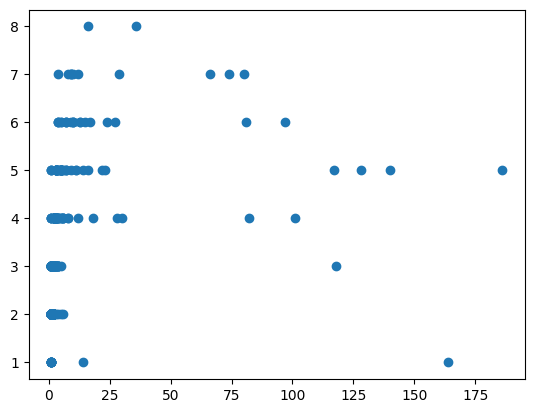

In [10]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

total_relevant_protos = 0.
total_good_protos = 0.

num_descendants = []
good_protos = []

with torch.no_grad():
    for node in root.nodes_with_children():
        label_to_children = {v: k for k, v in node.children_to_labels.items()}
        classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
        for class_idx in range(classification_weights.shape[0]):
            num_descendants.append(node.get_node(label_to_children[class_idx]).num_leaf_descendents())
            good_protos.append((classification_weights[class_idx, :] > 1e-3).sum().item())

# print('Total protos:', total_relevant_protos, 'Total good protos:', total_good_protos, 'Ratio:', total_good_protos/total_relevant_protos)
plt.scatter(num_descendants, good_protos, marker='o')
plt.show()

# Num descendants vs Num protos (after masking)

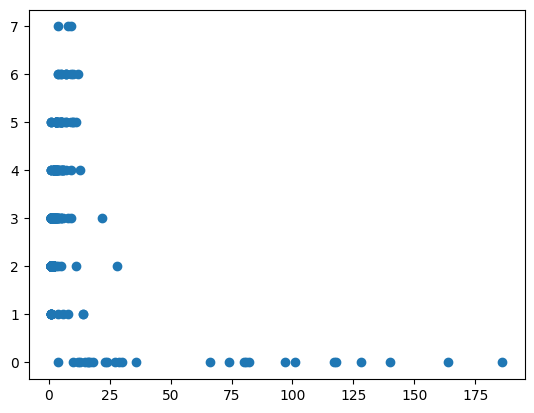

In [11]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

total_relevant_protos = 0.
total_good_protos = 0.

num_descendants = []
good_protos = []

with torch.no_grad():
    for node in root.nodes_with_children():
        label_to_children = {v: k for k, v in node.children_to_labels.items()}
        classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
        proto_presence = getattr(net.module, '_'+node.name+'_proto_presence')
        proto_presence = F.gumbel_softmax(proto_presence, tau=0.5, hard=True, dim=-1)
        masked_classification_weights = proto_presence[:, 1].unsqueeze(0) * classification_weights
        all_protos_masked = False
        for class_idx in range(masked_classification_weights.shape[0]):
            # print(node.name, label_to_children[class_idx], 'relevant:', (classification_weights[class_idx, :] > 1e-3).sum().item(), \
            #       'Good ones:', (masked_classification_weights[class_idx, :] > 1e-3).sum().item(), \
            #       'Good proto idxs:', torch.nonzero(masked_classification_weights[class_idx, :] > 1e-3).reshape(-1))
            # total_relevant_protos += (classification_weights[class_idx, :] > 1e-3).sum().item()
            # total_good_protos += (masked_classification_weights[class_idx, :] > 1e-3).sum().item()
            num_descendants.append(node.get_node(label_to_children[class_idx]).num_leaf_descendents())
            good_protos.append((masked_classification_weights[class_idx, :] > 1e-3).sum().item())

# print('Total protos:', total_relevant_protos, 'Total good protos:', total_good_protos, 'Ratio:', total_good_protos/total_relevant_protos)
plt.scatter(num_descendants, good_protos, marker='o')
plt.show()

In [32]:
from torch.utils.data import Sampler, SubsetRandomSampler

def create_filtered_dataloader(dataloader, new_sampler):
    if type(dataloader.dataset) == ImageFolder:
        dataset = dataloader.dataset
    else:
        dataset = dataloader.dataset.dataset.dataset
    new_dataloader = DataLoader(
        dataset=dataset,
        batch_size=dataloader.batch_size,
        shuffle=False,
        sampler=new_sampler,
        num_workers=dataloader.num_workers,
        pin_memory=dataloader.pin_memory,
        drop_last=dataloader.drop_last,
        timeout=dataloader.timeout,
        worker_init_fn=dataloader.worker_init_fn,
        multiprocessing_context=dataloader.multiprocessing_context,
        generator=dataloader.generator,
        prefetch_factor=dataloader.prefetch_factor,
        persistent_workers=dataloader.persistent_workers
    )
    return new_dataloader

leave_out_loader = testloader
# leave_out_loader = test_projectloader
unique_labels = set()
total_samples = 0
for xs, ys in testloader:
    unique_labels.update(ys.tolist())
    total_samples += xs.shape[0]
print("testloader Unique Labels:", unique_labels)
print("testloader total_samples:", total_samples)

if ('leave_out_classes' in args) and (args.leave_out_classes != ''):
    leave_out_classes = args.leave_out_classes.split(',')[2]
    print('leave_out_classes', leave_out_classes)
    idx_of_classes_to_keep = set()
    name2label = leave_out_loader.dataset.class_to_idx # param
    label2name = {label:name for name, label in name2label.items()}
    for label in label2name:
        # NOTE: Keeping the left out classes here
        if label2name[label] in leave_out_classes:
            idx_of_classes_to_keep.add(label)

    target_indices = []
    for i in range(len(leave_out_loader.dataset)):
        *_, label = leave_out_loader.dataset[i]
        if label in idx_of_classes_to_keep:
            target_indices.append(i)
    sampler = SubsetRandomSampler(target_indices)
    to_shuffle = False
else:
    print('Model not trained with LOU')
    
leave_out_loader = create_filtered_dataloader(leave_out_loader, sampler)
unique_labels = set()
total_samples = 0
for xs, ys in leave_out_loader:
    unique_labels.update(ys.tolist())
    total_samples += xs.shape[0]
print("leave_out_loader Unique Labels:", unique_labels)
print("leave_out_loader total_samples:", total_samples)

name2label = leave_out_loader.dataset.class_to_idx
label2name = {label:name for name, label in name2label.items()}

print('Leave out classes', args.leave_out_classes)

testloader Unique Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28}
testloader total_samples: 844
leave_out_classes cub_037_Acadian_Flycatcher
leave_out_loader Unique Labels: {1}
leave_out_loader total_samples: 29
Leave out classes cub_191_Red_headed_Woodpecker,cub_153_Philadelphia_Vireo,cub_037_Acadian_Flycatcher


In [33]:
leave_out_loader.dataset.class_to_idx

{'cub_036_Northern_Flicker': 0,
 'cub_037_Acadian_Flycatcher': 1,
 'cub_038_Great_Crested_Flycatcher': 2,
 'cub_039_Least_Flycatcher': 3,
 'cub_040_Olive_sided_Flycatcher': 4,
 'cub_041_Scissor_tailed_Flycatcher': 5,
 'cub_042_Vermilion_Flycatcher': 6,
 'cub_043_Yellow_bellied_Flycatcher': 7,
 'cub_077_Tropical_Kingbird': 8,
 'cub_078_Gray_Kingbird': 9,
 'cub_079_Belted_Kingfisher': 10,
 'cub_080_Green_Kingfisher': 11,
 'cub_081_Pied_Kingfisher': 12,
 'cub_082_Ringed_Kingfisher': 13,
 'cub_083_White_breasted_Kingfisher': 14,
 'cub_102_Western_Wood_Pewee': 15,
 'cub_151_Black_capped_Vireo': 16,
 'cub_152_Blue_headed_Vireo': 17,
 'cub_153_Philadelphia_Vireo': 18,
 'cub_154_Red_eyed_Vireo': 19,
 'cub_155_Warbling_Vireo': 20,
 'cub_156_White_eyed_Vireo': 21,
 'cub_157_Yellow_throated_Vireo': 22,
 'cub_187_American_Three_toed_Woodpecker': 23,
 'cub_188_Pileated_Woodpecker': 24,
 'cub_189_Red_bellied_Woodpecker': 25,
 'cub_190_Red_cockaded_Woodpecker': 26,
 'cub_191_Red_headed_Woodpecker': 2

# Leave out without mask pruning

In [34]:
# testloader

test_info, log_dict = test_pipnet(net, leave_out_loader, optimizer_net, optimizer_classifier, \
                                    scheduler_net, scheduler_classifier, criterion, 0, \
                                        args.epochs, device, pretrain=False, finetune=False, \
                                        test_loader_OOD=testloader_OOD, kernel_orth=args.kernel_orth == 'y', \
                                            tanh_desc=args.tanh_desc == 'y', align=args.align == 'y', uni=args.uni == 'y', align_pf=args.align_pf == 'y',\
                                            minmaximize=args.minmaximize == 'y', wandb_run=wandb_run, pretrain_epochs=args.epochs_pretrain, log=log, \
                                          args=args, apply_overspecificity_mask=False)

Test Epoch0: 100% 1/1 [00:00<00:00,  4.03it/s, L:0.196,LC:0.998, L_OVSP:-0.051, L_MASKL1:0.005, L_ACT_L1:-5.000, L_CONC_LOG_IP:-5.000, L_ANT_CONC_LOG_IP:-5.000, LA:0.00, L_UNI:-1.423, LT:-5.000, L_MM:-5.000, L_OOD:-5.000, L_ORTH:0.002, L_BYOL:-5.000, L_CLUS_DESC:-5.000, L_SEP_DESC:-5.000, LT_DESC:-5.000, L_SS:-5.000, losses_used:MASK_PRUNING+AL_PF+KO+CL]

	Fine accuracy: 0.0
	Node name: root, acc: 100.0, f1:100.0, samples: 58, 083+188=0/0=nan, 154+038=58/58=1.0
	Node name: 083+188, acc: inf, f1:inf, samples: 0, 083+079=0/0=nan, 188+189=0/0=nan
	Node name: 154+038, acc: 96.55, f1:98.25, samples: 58, 154+152=0/0=nan, 038+042=56/58=0.97
	Node name: 083+079, acc: inf, f1:inf, samples: 0, cub_083_White_breasted_Kingfisher=0/0=nan, 079+080=0/0=nan
	Node name: 188+189, acc: inf, f1:inf, samples: 0, 188+036=0/0=nan, 189+187=0/0=nan
	Node name: 154+152, acc: inf, f1:inf, samples: 0, 154+155=0/0=nan, 152+156=0/0=nan
	Node name: 038+042, acc: 100.0, f1:100.0, samples: 58, 038+041=0/0=nan, 042+102=58/58=1.0
	Node name: 079+080, acc: inf, f1:inf, samples: 0, 079+082=0/0=nan, 080+081=0/0=nan
	Node name: 188+036, acc: inf, f1:inf, samples: 0, cub_188_Pileated_Woodpecker=0/0=nan, cub_036_Northern_Flicker=0/0=nan
	Node name: 189+187, acc: inf, f1:inf, samples: 0, 189+191=0/0=nan, 187+190=0/0=nan
	Node name: 154+155, acc: inf, f1:inf, samples: 0, cub_154

# Leave out with mask pruning

In [35]:
# testloader

test_info, log_dict = test_pipnet(net, leave_out_loader, optimizer_net, optimizer_classifier, \
                                    scheduler_net, scheduler_classifier, criterion, 0, \
                                        args.epochs, device, pretrain=False, finetune=False, \
                                        test_loader_OOD=testloader_OOD, kernel_orth=args.kernel_orth == 'y', \
                                            tanh_desc=args.tanh_desc == 'y', align=args.align == 'y', uni=args.uni == 'y', align_pf=args.align_pf == 'y',\
                                            minmaximize=args.minmaximize == 'y', wandb_run=wandb_run, pretrain_epochs=args.epochs_pretrain, log=log, \
                                          args=args, apply_overspecificity_mask=True)

Test Epoch0: 100% 1/1 [00:00<00:00,  2.15it/s, L:0.239,LC:0.978, L_OVSP:-0.042, L_MASKL1:0.005, L_ACT_L1:-5.000, L_CONC_LOG_IP:-5.000, L_ANT_CONC_LOG_IP:-5.000, LA:0.00, L_UNI:-1.423, LT:-5.000, L_MM:-5.000, L_OOD:-5.000, L_ORTH:0.002, L_BYOL:-5.000, L_CLUS_DESC:-5.000, L_SEP_DESC:-5.000, LT_DESC:-5.000, L_SS:-5.000, losses_used:MASK_PRUNING+AL_PF+KO+CL]


	Fine accuracy: 0.86
	Node name: root, acc: 100.0, f1:100.0, samples: 58, 083+188=0/0=nan, 154+038=58/58=1.0
	Node name: 083+188, acc: inf, f1:inf, samples: 0, 083+079=0/0=nan, 188+189=0/0=nan
	Node name: 154+038, acc: 96.55, f1:98.25, samples: 58, 154+152=0/0=nan, 038+042=56/58=0.97
	Node name: 083+079, acc: inf, f1:inf, samples: 0, cub_083_White_breasted_Kingfisher=0/0=nan, 079+080=0/0=nan
	Node name: 188+189, acc: inf, f1:inf, samples: 0, 188+036=0/0=nan, 189+187=0/0=nan
	Node name: 154+152, acc: inf, f1:inf, samples: 0, 154+155=0/0=nan, 152+156=0/0=nan
	Node name: 038+042, acc: 100.0, f1:100.0, samples: 58, 038+041=0/0=nan, 042+102=58/58=1.0
	Node name: 079+080, acc: inf, f1:inf, samples: 0, 079+082=0/0=nan, 080+081=0/0=nan
	Node name: 188+036, acc: inf, f1:inf, samples: 0, cub_188_Pileated_Woodpecker=0/0=nan, cub_036_Northern_Flicker=0/0=nan
	Node name: 189+187, acc: inf, f1:inf, samples: 0, 189+191=0/0=nan, 187+190=0/0=nan
	Node name: 154+155, acc: inf, f1:inf, samples: 0, cub_15

In [36]:
# print(net.module._root_proto_presence)
# print(net.module._root_proto_presence.shape)

In [37]:
# net.module._root_proto_presence[:, 0].shape

In [38]:
# torch.cat([net.module._root_proto_presence[:, 1].unsqueeze(-1), net.module._root_proto_presence[:, 0].unsqueeze(-1)], dim=-1)#.shape

In [39]:
with torch.no_grad():
    for node in root.nodes_with_children():
        net.module._root_proto_presence
        proto_presence = getattr(net.module, '_'+node.name+'_proto_presence')
        reversed_proto_presence = torch.cat([proto_presence[:, 1].unsqueeze(-1), proto_presence[:, 0].unsqueeze(-1)], dim=-1)
        setattr(net.module, '_'+node.name+'_proto_presence', \
                nn.Parameter(reversed_proto_presence))

    test_info, log_dict = test_pipnet(net, leave_out_loader, optimizer_net, optimizer_classifier, \
                                    scheduler_net, scheduler_classifier, criterion, 0, \
                                        args.epochs, device, pretrain=False, finetune=False, \
                                        test_loader_OOD=testloader_OOD, kernel_orth=args.kernel_orth == 'y', \
                                            tanh_desc=args.tanh_desc == 'y', align=args.align == 'y', uni=args.uni == 'y', align_pf=args.align_pf == 'y',\
                                            minmaximize=args.minmaximize == 'y', wandb_run=wandb_run, pretrain_epochs=args.epochs_pretrain, log=log, \
                                          args=args, apply_overspecificity_mask=True)

Test Epoch0: 100% 1/1 [00:00<00:00,  4.00it/s, L:0.188,LC:0.526, L_OVSP:-0.014, L_MASKL1:0.001, L_ACT_L1:-5.000, L_CONC_LOG_IP:-5.000, L_ANT_CONC_LOG_IP:-5.000, LA:0.00, L_UNI:-1.423, LT:-5.000, L_MM:-5.000, L_OOD:-5.000, L_ORTH:0.002, L_BYOL:-5.000, L_CLUS_DESC:-5.000, L_SEP_DESC:-5.000, LT_DESC:-5.000, L_SS:-5.000, losses_used:MASK_PRUNING+AL_PF+KO+CL]

	Fine accuracy: 0.0
	Node name: root, acc: 100.0, f1:100.0, samples: 58, 083+188=0/0=nan, 154+038=58/58=1.0
	Node name: 083+188, acc: inf, f1:inf, samples: 0, 083+079=0/0=nan, 188+189=0/0=nan
	Node name: 154+038, acc: 100.0, f1:100.0, samples: 58, 154+152=0/0=nan, 038+042=58/58=1.0
	Node name: 083+079, acc: inf, f1:inf, samples: 0, cub_083_White_breasted_Kingfisher=0/0=nan, 079+080=0/0=nan
	Node name: 188+189, acc: inf, f1:inf, samples: 0, 188+036=0/0=nan, 189+187=0/0=nan
	Node name: 154+152, acc: inf, f1:inf, samples: 0, 154+155=0/0=nan, 152+156=0/0=nan
	Node name: 038+042, acc: 0.0, f1:0.0, samples: 58, 038+041=0/0=nan, 042+102=0/58=0.0
	Node name: 079+080, acc: inf, f1:inf, samples: 0, 079+082=0/0=nan, 080+081=0/0=nan
	Node name: 188+036, acc: inf, f1:inf, samples: 0, cub_188_Pileated_Woodpecker=0/0=nan, cub_036_Northern_Flicker=0/0=nan
	Node name: 189+187, acc: inf, f1:inf, samples: 0, 189+191=0/0=nan, 187+190=0/0=nan
	Node name: 154+155, acc: inf, f1:inf, samples: 0, cub_154_Red_e